In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

from sklearn.model_selection import KFold

### Обучение и выполнение лучшей модели

In [2]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = 'test_house_A.csv'# содержит только имя файла, без имен папок

In [3]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:

X = df_train.drop(columns = ['price'])
y = df_train['price']

## Используемые признаки

In [5]:
important_col = ['0', '4', '5', '6', '7', '8', '9', '12', '13', '16', '20', '21',
       '22', '24', '28']

In [6]:
X = X.loc[:, important_col]

In [7]:
model_target = TransformedTargetRegressor(
               regressor = Pipeline(steps=[
                                ('estimator', Ridge(alpha=2, solver='lsqr'))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False
)

model_target.fit(X,y)

TransformedTargetRegressor(check_inverse=False,
                           regressor=Pipeline(steps=[('estimator',
                                                      Ridge(alpha=2,
                                                            solver='lsqr'))]),
                           transformer=PowerTransformer())

In [8]:
# Блок предсказания с использованием тестового набора

In [9]:
mask = important_col
X_test = pd.read_csv(path_test)[mask]

y_pred = model_target.predict(X_test)
print(y_pred)

[ 6807891.42694204  7135295.65510876  2947001.97582967  4657304.49654667
  3403565.52807894  3116661.61088413 10313467.33171726  8792394.14497599
  3608934.34586572  6961944.30442902  8249101.92729342  4264688.70892025
  4891232.51688109  3308237.17725742  3868497.06204674 12021771.50245432
  4391862.02579912  5245632.52489497  4280345.56549022  6460048.69389375
  3072764.72315156  4086777.83184875  6537552.07658539  3380600.99428929
  3507849.6810657   3396242.52235344  6193004.95472467  3113178.43610236
  2894711.34795018  4058597.7999867   3905785.27161229  6565676.96311733
  4663160.0398179   3945984.48080304  5021740.13931988  3287745.93354869
  3518189.31640621  2486843.10092799  4368582.65846079  5009086.95327
  6437518.04269573  3845435.27904689  7996868.7050111   5070168.53412848
  2945843.18211758  5914482.06810485  5595085.62048617  3411426.99361397
  4730548.93870524  2827824.98465785  5815000.93488688  2864871.60938302
  6058432.13693484  4920331.27687887  2936157.50583121

In [10]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора

In [11]:
y_predict = y_pred

In [12]:
y_predict

array([ 6807891.42694204,  7135295.65510876,  2947001.97582967,
        4657304.49654667,  3403565.52807894,  3116661.61088413,
       10313467.33171726,  8792394.14497599,  3608934.34586572,
        6961944.30442902,  8249101.92729342,  4264688.70892025,
        4891232.51688109,  3308237.17725742,  3868497.06204674,
       12021771.50245432,  4391862.02579912,  5245632.52489497,
        4280345.56549022,  6460048.69389375,  3072764.72315156,
        4086777.83184875,  6537552.07658539,  3380600.99428929,
        3507849.6810657 ,  3396242.52235344,  6193004.95472467,
        3113178.43610236,  2894711.34795018,  4058597.7999867 ,
        3905785.27161229,  6565676.96311733,  4663160.0398179 ,
        3945984.48080304,  5021740.13931988,  3287745.93354869,
        3518189.31640621,  2486843.10092799,  4368582.65846079,
        5009086.95327   ,  6437518.04269573,  3845435.27904689,
        7996868.7050111 ,  5070168.53412848,  2945843.18211758,
        5914482.06810485,  5595085.62048

In [13]:
print(important_col)

['0', '4', '5', '6', '7', '8', '9', '12', '13', '16', '20', '21', '22', '24', '28']


(137,) (137,)
Отрицательные цены -  0
Max Error: 4,921,787
 
----------------------
   MAPE Error: 16.77
----------------------


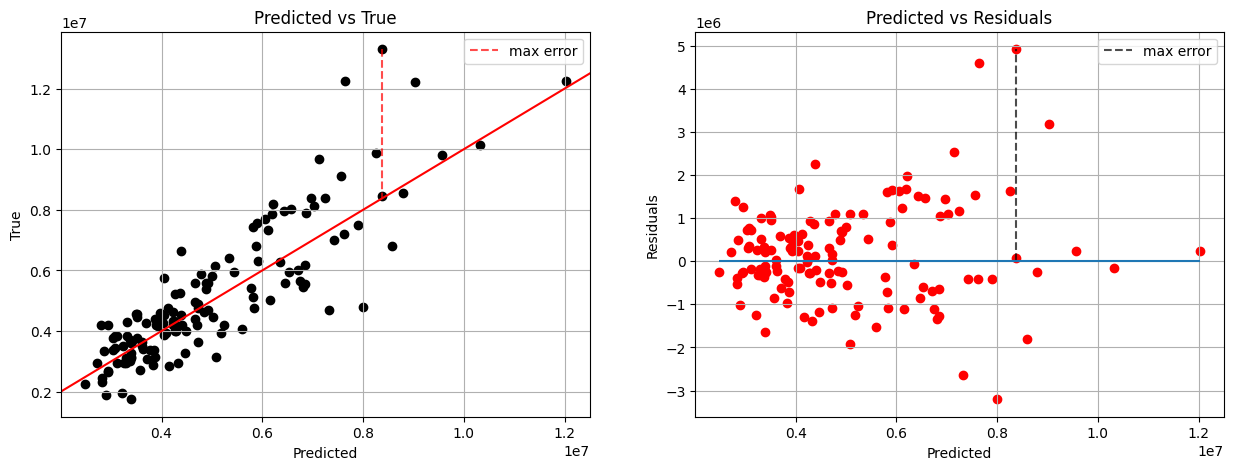

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [15]:
mask = important_col

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
